___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../../figures/capa2.png"/></a>
___

# Projeto de Regressão Linear

Parabéns! Você acabou de conseguir um trabalho com uma companhia de Ecommerce com sede na Cidade de Nova Iorque. Ela vende roupas de forma online e em lojas físicas, e tem até sessões de aconselhamento de estilo. Os consumidores vão para a loja e lá conseguem sessões com um estilista pessoal, quem auxiliará na escolha da roupa. Após isso ficam livres para escolher em casa por onde comprar, pelo aplicativo ou pelo site.

A empresa está tentando decidir entre qual das duas investir. Para isso te contrataram para ajudar na descoberta! 

Bora começar!

Apenas siga os passos abaixo para analisar os dados dos clientes (são ilustrativos, não são informações verídicas).

## Importações
**Importar pandas, numpy, matplotlib, seaborn e em seguida %matplotlib inline. (Você importará sklearn conforme precisar.)** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Pegar os dados

Vamos trabalhar com o arquivo csv Ecommerce Custumers da empresa, que possui as informações dos consumidores, como Email, Endereco e as cores de seus Avatares (Avatar). Além disso também há colunas com dados numéricos:


* Med. Duracao da Sessao: Sessão média de sessões de aconselhamento de estilo na loja.

* Tempo no App: Tempo médio gasto no aplicativo, em minutos.

* Tempo no Site: Tempo médio gasto no Site, em minutos.

* Tempo como Membro: Quantos anos o consumidor tem como um membro.

* Gasto Anual: Quanto o cliente gastou no ano.  


**Leia o arquivo csv Ecommerce Custumers como um DataFrame chamado de clientes.**

In [3]:
Clientes = pd.read_csv('Ecommerce Customers.csv')

**Cheque o topo dos consumidores, head(), além de describe() e info()**

In [4]:
Clientes.head()

,Email,Endereco,Avatar,Med. Duracao da Sessao,Tempo no App,Tempo no Site,Tempo como Membro,Gasto Anual
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
Clientes.describe()

,Med. Duracao da Sessao,Tempo no App,Tempo no Site,Tempo como Membro,Gasto Anual
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Email                   500 non-null    object 
 1   Endereco                500 non-null    object 
 2   Avatar                  500 non-null    object 
 3   Med. Duracao da Sessao  500 non-null    float64
 4   Tempo no App            500 non-null    float64
 5   Tempo no Site           500 non-null    float64
 6   Tempo como Membro       500 non-null    float64
 7   Gasto Anual             500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise de Dados Exploratrória 

**Bora explorar os dados**

Daqui em diante no exercício iremos apenas usar os dados numéricos do arquivo csv.
___
**Use seaborn para criar um jointplot para comparar as colunas Tempo no Site e Gasto Anual. Essa correlação faz sentido?**


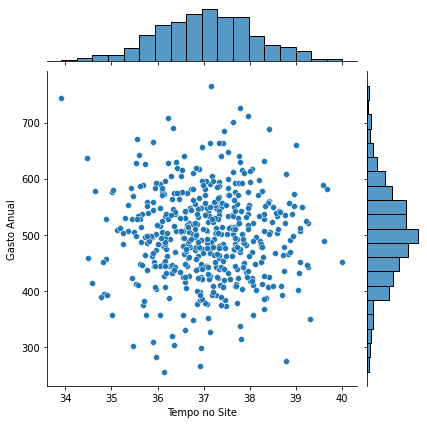

In [7]:
sns.jointplot(x='Tempo no Site',y='Gasto Anual',data=Clientes)

**Faça o mesmo, mas com a coluna Tempo no App**

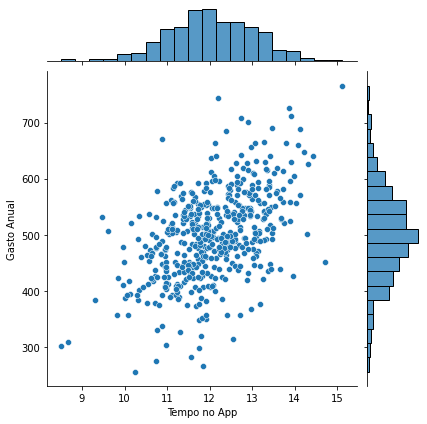

In [8]:
sns.jointplot(x='Tempo no App',y='Gasto Anual',data=Clientes)

**Use o jointplot para uma plotagem hexadecimal 2D, comparando Tempo no App com Tempo como Membro.**

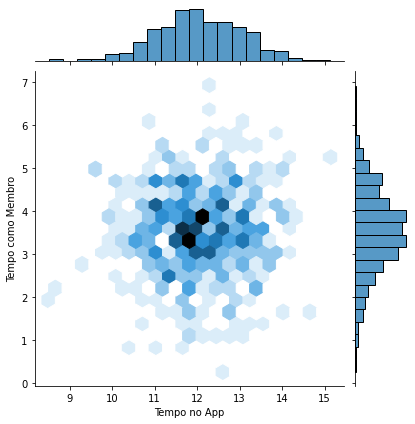

In [9]:
sns.jointplot(x='Tempo no App', y='Tempo como Membro',data=Clientes, kind='hex')

**Vamos explorar essas relações pelo Dataset todo. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o plot acima. (Não preocupe-se com as cores)**

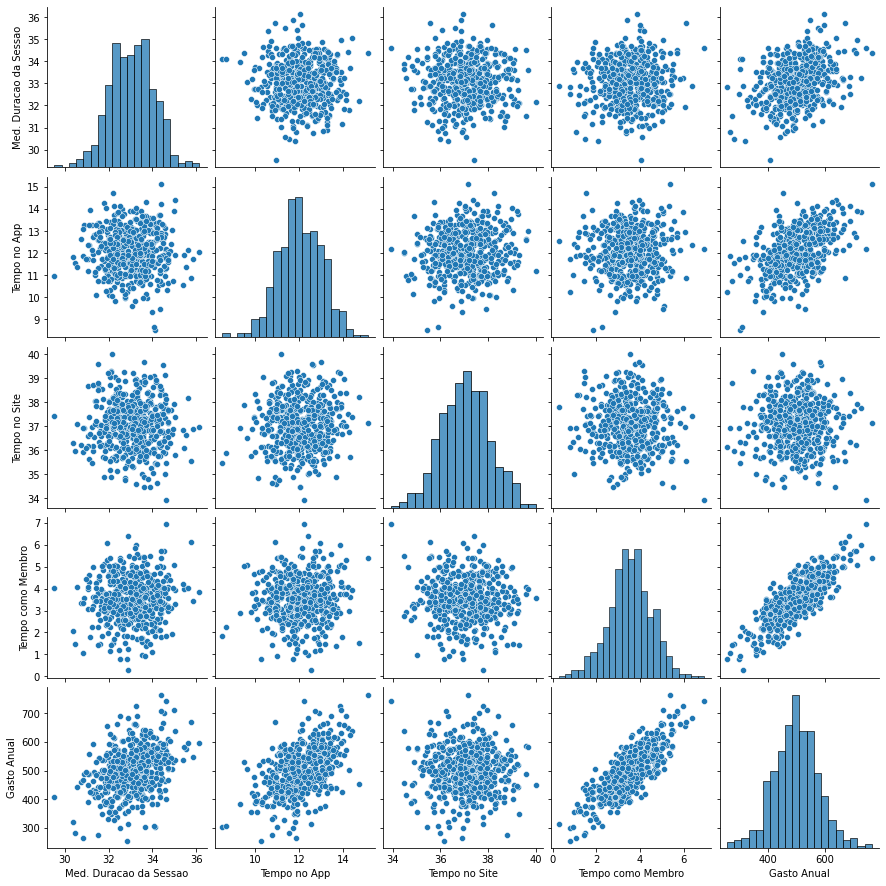

In [10]:
sns.pairplot(Clientes)

**Olhando esses plots, qual das variáveis parece estar mais relacionada com o Gasto Anual?**

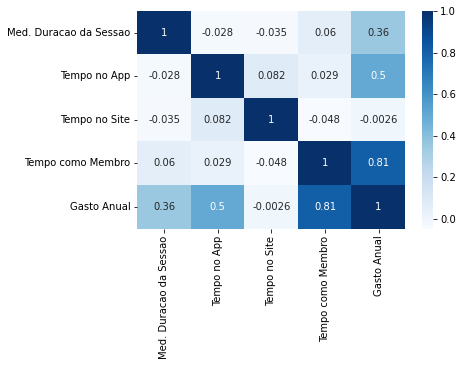

In [11]:
sns.heatmap(Clientes.corr(),cmap="Blues",annot=True)

**Plote um modelo linear (com Implot do seaborn) do Gasto Anual x Tempo como Membro. **

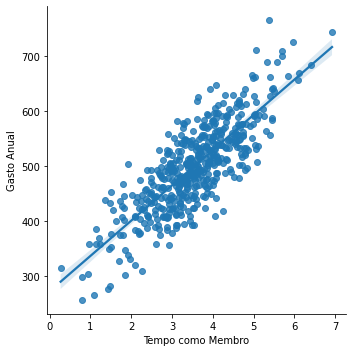

In [12]:
sns.lmplot(x='Tempo como Membro',y='Gasto Anual',data=Clientes)

## Treinando e Testando os Dados

Agora que exploramos um pouco os dados, vamos dividir os dados em conjuntos de treinamento e de teste.**
**Defina a variável X como os dados numéricos dos consumidores e a variável y como a coluna "Gasto Anual".**

In [13]:
X = Clientes[["Med. Duracao da Sessao","Tempo no App",
              "Tempo no Site", "Tempo como Membro"]]

In [14]:
y = Clientes[["Gasto Anual"]]

**Use model_selection.train_test_split do sklearn para dividir os dados em conjuntos de treinamento e de teste. Defina test_size=0.3 e random_state=101**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Treinando o Modelo

Agora é hora de treinar nosso modelo com nossos dados de treinamento!

**Importe LinearRegression de sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

**Crie uma instância de um modelo LinearRegression() chamado de lm.**

In [18]:
lm = LinearRegression()

**Treine/ajuste lm aos dados de treinamento**

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

**Printe is coeficientes do modelo**

In [20]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

##Prevendo os Dados de Teste
Agora que temos nosso primeiro modelo, vamos avaliar sua performance prevendo os valores de teste!

**Use lm.predict() para prever o X_test dos dados**

In [21]:
predictions = lm.predict(X_test)

**Crie um scatterplot dos valores reais do teste x valores previstos**

Text(0, 0.5, 'Predicted Y')

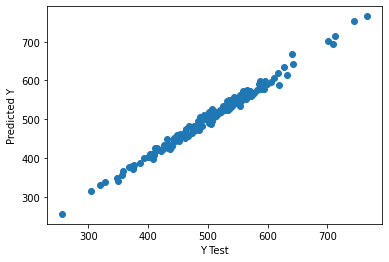

In [22]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

Vamos avaliar a performance do modelo, calculando a soma residual dos quadrados e a pontuação de variância explicada ($R^2$).

**Calcule o Erro Médio Absoluto (MAE), Erro Quadrático Médio (MSE) e a Raíz Quadrada do Erro Médio (RMSE)**

In [23]:
from sklearn import metrics

print('MAE:', 
      metrics.mean_absolute_error(y_test, predictions))
print('MSE:', 
      metrics.mean_squared_error(y_test, predictions))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


## Resíduos

Você deve ter conseguido um bom modelo com um bom ajuste. Vamos explorar rapidamente os residuais para ter certeza que tudo está ok com nossos dados.

**Plote um histograma dos residuais e tenha certeza que esteja normal e aparentemente distribuído, ou só faça um plt.hist().**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


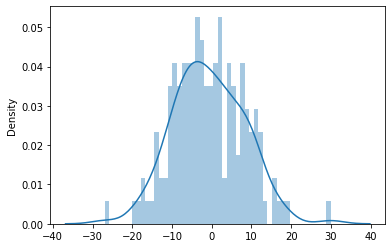

In [24]:
sns.distplot((y_test-predictions), bins = 50)

## Conclusão
Nós ainda queremos descobrir a resposta da primeira pergunta, investimos no desenvolvimento do aplicativo ou do site? Ou talvez isso não importa e que o Tempo como Membro é o que realmente faz a diferença. Veremos se conseguimos interpretar os coeficientes para ter uma ideia. 
**Recrie o dataframe abaixo.**

In [25]:
df = pd.DataFrame(index = X_train.columns, columns = ["Coefficient"], data=lm.coef_[0][0:4])
df.head()

,Coefficient
Med. Duracao da Sessao,25.981550
Tempo no App,38.590159
Tempo no Site,0.190405
Tempo como Membro,61.279097


**Como você interpreta esses coeficientes?**

*Responda aqui*

**Onde você acha que a empresa deve focar mais? No aplicativo ou no site?**

*Responda aqui*

## Bom Trabalho!

Parabéns pelo seu trabalho! A empresa adorou a solução! Bola pra frente.